# Crypto Market Prioritization

In this analysis, we sought to dig deeper into the ever-expanding realm of cryptocurrency and quantitative hedge fund strategies. In recent years, we have witnessed an astronomical surge in crypto interest among investors everywhere. No longer are equities/bonds/etc. the sole money makers – rather, crypto is delivering high, quick returns, turning pennies into millions. The questions we thus sought to answer was, "How do crypto returns differ among high and low market cap/volume cyrptos (i.e. do cryptos with high volumes or high market caps generally deliver the greatest annual returns, or is there opportunity in the overlooked, low volume/market cap market)?" and "Between high and low volume/market cap cryptos, which market is more suitable for high frequency trading strategies (HFT)?" The former question assumes a more fundamental long-term approach (looking at yearly returns), which we felt would be suitably complemented by a day trading outlook through the second question. HFT (second question) has become popular among quantitave hedge funds who seek to predict market prices and conduct arbitrage, which should theoretically be applicable to the crypto market; thus, we wanted to see which cryptos this day-trading strategy would be ideal for.   

For the fundamental, long-term outlook, we looked at bottom and top quartile categories in volume and market cap. We found the maximum, minimum, and median average yearly returns across these groups to deduce the riskiness associated with each category's investment potential (i.e. we sought to find any correlation that would show whether low or high volume cryptos, for instance, tended to deliver safer, higher returns). 

For High Frequency Strategies, we used Bitcoin and Ethereum as proxies for the high market cap/volume category and ran regression models on a day to day basis, using x-variables: volume, open, market cap, to predict y-variable closing price. We then compared this to the median of the lower volume/market crytpo category to see which category of crypto is easier to predict and thus more suitable for quantitative HFT strategies. (We are using BTC and ETH as our cryptos of choice due to the high liquidity necessary for high frequency trading, as well as their accessibility to Quantitative Firms).

## Contents

*i. Reading in the data*

*ii. Cleaning and Shaping the data*

I. Average Returns for Bottom Quartile Volume

    I.1 Minimum Gainer

    I.2 Median Gainer

    I.3 Maximum Gainer

II. Average Returns for Top Quartile Volume

    II.1 Minimum Gainer

    II.2 Median Gainer

    II.3 Maximum Gainer

III. Average Returns for Bottom Quartile Market Cap

    III.1 Minimum Gainer

    III.2 Median Gainer

    III.3 Maximum Gainer

IV. Average Returns for Top Quartile Market Cap

    IV.1 Minimum Gainer

    IV.2 Median Gainer

    IV.3 Maximum Gainer

V. Bar Charts of Min, Max Return of each quartile 

VI. Regressions

    VI.1 Polynomial Regression

    VI.2 ML Regression

    VI.3 Decision Tree Regression

    VI.4 Linear Regression
    
VII. Conclusion

### *i. Reading in the data*

In [89]:
#Imports
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
#Loading Data
data = pd.read_csv('all_currencies.csv')
data

#Dataset from 2015-2018; not most recent, but still useful nonetheless

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
0,0,2015-11-12,$$$,0.000013,0.000017,0.000013,0.000017,142.0,NaN
1,1,2015-11-13,$$$,0.000017,0.000033,0.000016,0.000024,85.0,NaN
2,2,2015-11-14,$$$,0.000024,0.000053,0.000023,0.000030,131.0,NaN
3,3,2015-11-15,$$$,0.000030,0.000063,0.000022,0.000035,132.0,NaN
4,4,2015-11-16,$$$,0.000035,0.000046,0.000032,0.000036,280.0,NaN
...,...,...,...,...,...,...,...,...,...
632213,298,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
632214,299,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
632215,300,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
632216,301,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0


### *ii. Cleaning*
* Drop infinities, empties, and nulls
* Add helper functions to make Average Value Column
* Add helper functions for Average Value Return List for easy access

In [53]:
#dropping, infinities, empties, and nulls
data = data.replace([np.inf, -np.inf, 'empty', 'unknown'], np.nan)
data = data.dropna()

#Get bottom and top quartiles of volume
Q1 = data.Volume.quantile(q=0.25)
Q3 = data.Volume.quantile(q=0.75)

botQuartile = data[data['Volume'] < Q1]
topQuartile = data[data['Volume'] > Q3]

In [54]:
#Function to add average return for a Quartile, and start and end date:
def populateVolume(botQuart, date1, date2):
    botQuart['Date'] = pd.to_datetime(botQuart['Date'])
    bot2015 = botQuart[(botQuart['Date'] > date1) & (botQuart['Date'] < date2)]
    returnList = []
    for symbols in bot2015['Symbol'].unique():
        returnList.append(bot2015.loc[bot2015['Symbol'] == symbols]['Close'].iloc[-1] / bot2015.loc[bot2015['Symbol'] == symbols]['Close'].iloc[0] - 1)
    data2015 = bot2015
    data2015 = data2015.drop_duplicates(subset = ["Symbol"])
    data2015['averageReturn'] = returnList
    return data2015
#Function to create average return list for easy access to median, mean, min, max values etc...
def populateReturnList(df):
    returnList = []
    for vals in df['averageReturn']:
        returnList.append(vals)
    returnList.sort()
    return returnList
def minSymbol(df, returnList):
    return df[df['averageReturn'] == returnList[0]]['Symbol']
def medianSymbol(df, returnList):
    return df[df['averageReturn'] == returnList[len(returnList) // 2]]['Symbol']
def maxSymbol(df, returnList):
    return df[df['averageReturn'] == returnList[-1]]['Symbol']

With our cleaning processes complete, our data now looks like this:

In [55]:
data

,Unnamed: 0,Date,Symbol,Open,High,Low,Close,Volume,Market Cap
29,29,2015-12-11,$$$,0.000050,0.000050,0.000022,0.000027,1.0,2287.0
30,30,2015-12-12,$$$,0.000027,0.000044,0.000021,0.000043,0.0,1245.0
31,31,2015-12-13,$$$,0.000043,0.000044,0.000022,0.000022,2.0,1996.0
32,32,2015-12-14,$$$,0.000022,0.000022,0.000022,0.000022,3.0,994.0
33,33,2015-12-15,$$$,0.000022,0.000023,0.000022,0.000023,2.0,1018.0
...,...,...,...,...,...,...,...,...,...
632213,298,2018-09-23,ZZC,0.067149,0.067324,0.024069,0.024161,34.0,130705.0
632214,299,2018-09-24,ZZC,0.024167,0.091875,0.024121,0.091631,58.0,47041.0
632215,300,2018-09-25,ZZC,0.091528,0.091568,0.057507,0.090547,752.0,178158.0
632216,301,2018-09-26,ZZC,0.090400,0.104745,0.086071,0.086559,60.0,175963.0


## I. Average Returns for Bottom Quartile Volume

In [56]:
data2015 = populateVolume(botQuartile, '11-12-2015', '11-12-2018')

For sections I-IV, we graph the Minimum, Median, and Maximum gainers for bottom quartile volumes, top quartile volumes, bottom quartile market caps, and top quartile market cap cryptos. This shows us the average price fluctuations over the time period in the dataset, which will allow us to find the average returns among these crypto groups. By plotting the max, min, and median average returns, we can deduce which crypto group on average has tended to offer the safest investment. This can provide valuable insight for retail investors who may simply revert to investing in BTC and ETH thinking they offer the safest/best returns, considering they have the highest media coverage.


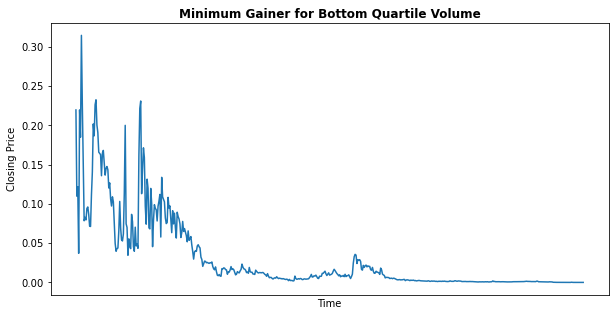

In [58]:
#PLOTTING MIN GAINER
plt.figure(figsize=(10,5))
plt.title("Minimum Gainer for Bottom Quartile Volume", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == minSymbol(data2015, populateReturnList(data2015)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

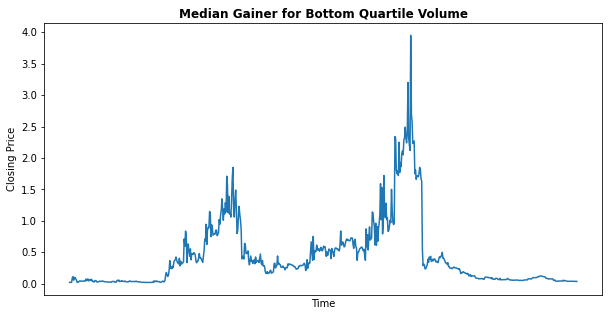

In [59]:
#PLOTTING MEDIAN GAINER
plt.figure(figsize=(10,5))
plt.title("Median Gainer for Bottom Quartile Volume", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == medianSymbol(data2015, populateReturnList(data2015)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

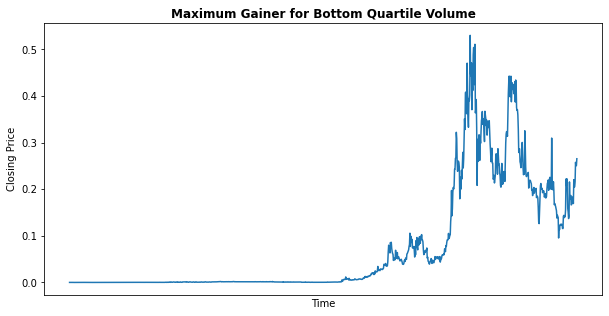

In [60]:
#PLOTTING MAX GAINER
plt.figure(figsize=(10,5))
plt.title("Maximum Gainer for Bottom Quartile Volume", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == maxSymbol(data2015, populateReturnList(data2015)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

## II. Average Returns for Top Quartile Volume


In [61]:
#FINDING DATA FROM TOP QUARTILE FOR VOLUME
topVols = populateVolume(topQuartile, '11-12-2015', '11-12-2018')

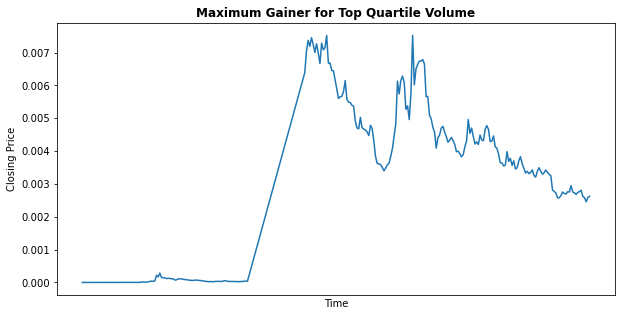

In [62]:
#PLOTTING MAX GAINER
plt.figure(figsize=(10,5))
plt.title("Maximum Gainer for Top Quartile Volume", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == maxSymbol(topVols, populateReturnList(topVols)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

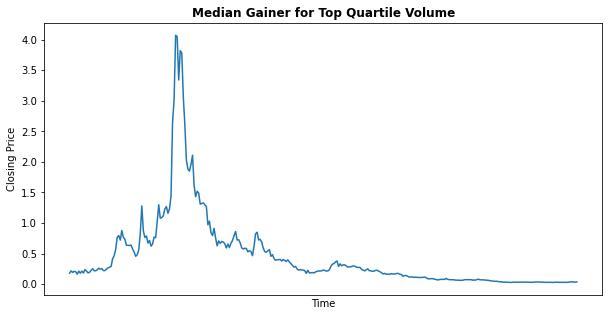

In [63]:
#PLOTTING MEDIAN GAINER
plt.figure(figsize=(10,5))
plt.title("Median Gainer for Top Quartile Volume", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == medianSymbol(topVols, populateReturnList(topVols)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

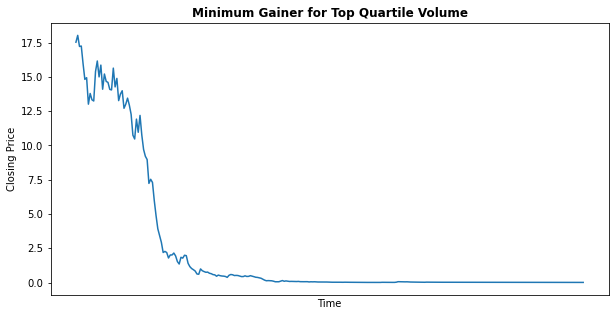

In [64]:
#PLOTTING MIN GAINER
plt.figure(figsize=(10,5))
plt.title("Minimum Gainer for Top Quartile Volume", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == minSymbol(topVols, populateReturnList(topVols)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

## III. Average Returns for Bottom Quartile Market Cap


In [86]:
#Separate Data into top and bottom quartiles of Market Cap
#Get bottom and top quartiles of Market Cap
Q1 = data.loc[:,"Market Cap"].quantile(q=0.25)
Q3 = data.loc[:,"Market Cap"].quantile(q=0.75)

marketBot = data[data['Market Cap'] < Q1]
marketTop = data[data['Market Cap'] > Q3]


In [87]:
#Bottom quartile of market cap 
bottomData = populateVolume(marketBot, '11-12-2015', '11-12-2018')

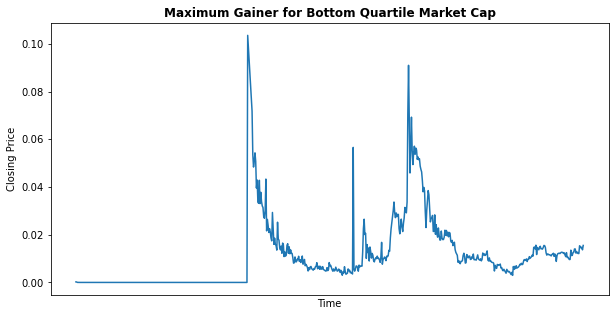

In [67]:
#PLOTTING MAX GAINER
plt.figure(figsize=(10,5))
plt.title("Maximum Gainer for Bottom Quartile Market Cap", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == maxSymbol(bottomData, populateReturnList(bottomData)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

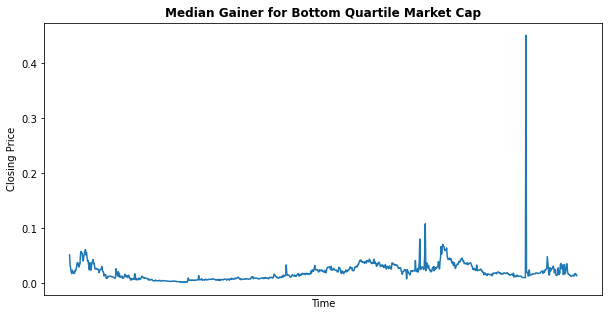

In [68]:
#PLOTTING MEDIAN GAINER
plt.figure(figsize=(10,5))
plt.title("Median Gainer for Bottom Quartile Market Cap", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == medianSymbol(bottomData, populateReturnList(bottomData)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

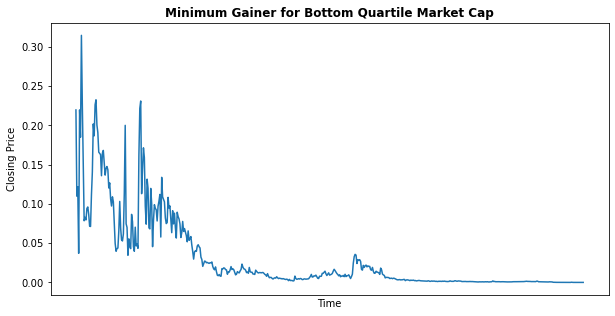

In [80]:
#PLOTTING MIN GAINER
plt.figure(figsize=(10,5))
plt.title("Minimum Gainer for Bottom Quartile Market Cap", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == minSymbol(bottomData, populateReturnList(bottomData)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

## IV. Average Returns for Top Quartile Market Cap

In [70]:
#Populating top quartile market cap 
topData = populateVolume(marketTop, '11-12-2015', '11-12-2018')

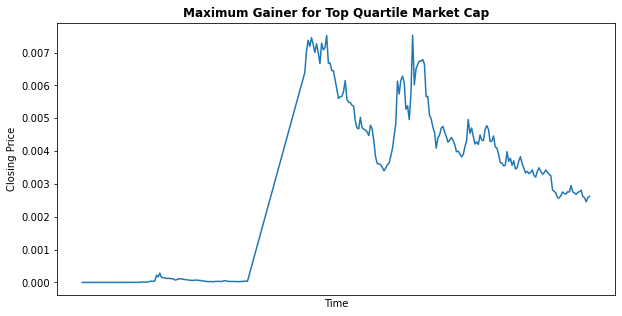

In [71]:
#PLOTTING MAX GAINER
plt.figure(figsize=(10,5))
plt.title("Maximum Gainer for Top Quartile Market Cap", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == maxSymbol(topData, populateReturnList(topData)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

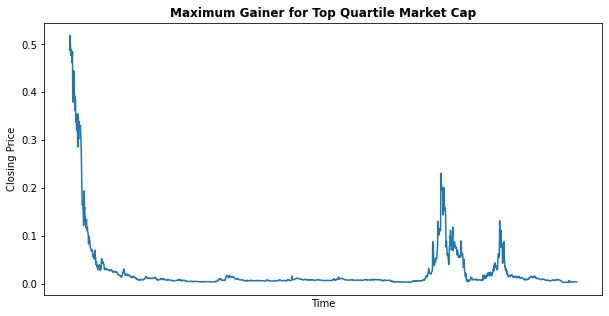

In [72]:
#PLOTTING MEDIAN GAINER
plt.figure(figsize=(10,5))
plt.title("Maximum Gainer for Top Quartile Market Cap", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == medianSymbol(topData, populateReturnList(topData)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

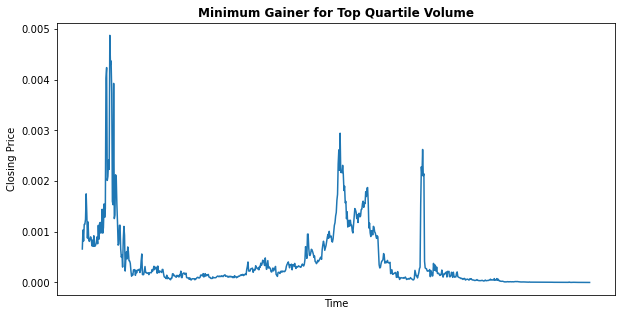

In [73]:
#PLOTTING MIN GAINER
plt.figure(figsize=(10,5))
plt.title("Minimum Gainer for Top Quartile Volume", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.plot(data[data['Symbol'] == minSymbol(topData, populateReturnList(topData)).iloc[0]]['Close'])
plt.tick_params(labelbottom = False, bottom = False)

## V. Bar Charts of Min, Max Return of each quartile 

In [88]:
#Bar Chart of Min, Max Return of each quartile 
topQuartMCmax = populateReturnList(topData)[0]
topQuartMCmin = populateReturnList(topData)[-1]
median1 = populateReturnList(topData)[len(populateReturnList(topData)) // 2]

botQuartMCmax = populateReturnList(bottomData)[0]
botQuartMCmin = populateReturnList(bottomData)[-1]
median2 = populateReturnList(bottomData)[len(populateReturnList(bottomData)) // 2]

topQuartVolmax = populateReturnList(topVols)[0]
topQuartVolmin = populateReturnList(topVols)[-1]
median3 = populateReturnList(topVols)[len(populateReturnList(topVols)) // 2]

botQuartVolmax = populateReturnList(data2015)[0]
botQuartVolmin = populateReturnList(data2015)[-1]
median4 = populateReturnList(data2015)[len(populateReturnList(data2015)) // 2]

In [75]:
barDataTQMC = pd.DataFrame({'titles': ['Max', 'Min', 'Median'], 'avg return' : [topQuartMCmin, topQuartMCmax*100, median1*100]})
barDataBQMC = pd.DataFrame({'titles': ['Max', 'Min', 'Median'], 'avg return' : [botQuartMCmin, botQuartMCmax*100, median2*100]})
barDataTQV = pd.DataFrame({'titles': ['Max', 'Min', 'Median'], 'avg return' : [topQuartVolmin, topQuartVolmax*100, median3*100]})
barDataBQV = pd.DataFrame({'titles': ['Max', 'Min', 'Median'], 'avg return' : [botQuartVolmin, botQuartVolmax*100, median4*100]})

## Top Quartile Market Cap

Text(0.5, 0, '')

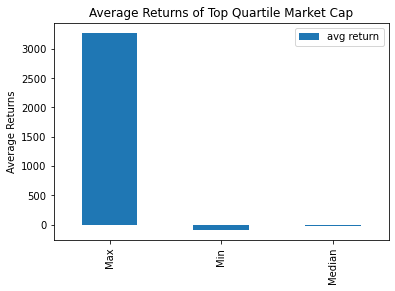

In [76]:
ax = barDataTQMC.plot.bar(x='titles', y = 'avg return', title="Average Returns of Top Quartile Market Cap")
ax.set_ylabel("Average Returns")
ax.set_xlabel("")

## Bottom Quartile Market Cap

Text(0.5, 0, '')

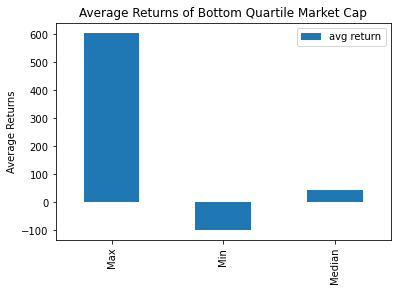

In [77]:
ax = barDataBQMC.plot.bar(x='titles', y = 'avg return', title="Average Returns of Bottom Quartile Market Cap")
ax.set_ylabel("Average Returns")
ax.set_xlabel("")

## Top Quartile Volume

Text(0.5, 0, '')

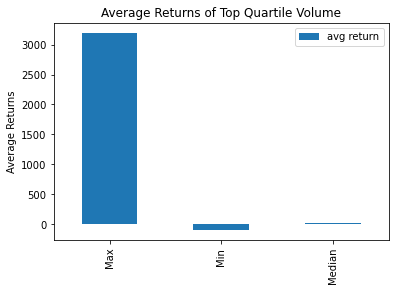

In [78]:
ax = barDataTQV.plot.bar(x='titles', y = 'avg return', title="Average Returns of Top Quartile Volume")
ax.set_ylabel("Average Returns")
ax.set_xlabel("")

## Bottom Quartile Volume

Text(0.5, 0, '')

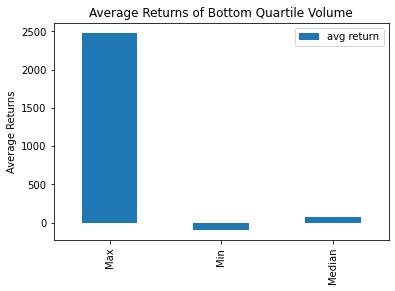

In [79]:
ax = barDataBQV.plot.bar(x='titles', y = 'avg return', title="Average Returns of Bottom Quartile Volume")
ax.set_ylabel("Average Returns")
ax.set_xlabel("")

As seen above, strictly basing off of median average return, bottom quartile market cap cryptos offer the best investment. Additionally, the spread between median, max, and minimum is far lower for bottom quartile market cap cryptos, signaling a lower beta and less risky investment (risk averse investors should maybe look more into this category). However, the highest payouts came from top quartile volume and market cap cryptos. This fits in line with what we've seen with recent trends (e.g. BTC and ETH delivering monumental returns). It is important to note though that the median for top volume cryptos was barely above 0 percent, which signals a high volatility, riskier investment, but also the potential for a larger payout relative to low volume/market cap cryptos.

## VI. Regressions and Predictions

## VI.1 Polynomial Regression and Prediction

Here, we are using the median gainers for low volume and low market cap cryptos as a proxy for regression on the whole of low volume and low market cap cryptos. Additionally, we are using BTC (and ETH in some cases) as cryptos to represent the high volume/market cap category due to the social popularity of these coins plus the their high liquidity necessary for high frequency trading strategies.

### Helper Function

In [83]:
def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))

In [84]:
lowVolData = data[data['Symbol'] == medianSymbol(data2015, populateReturnList(data2015)).iloc[0]]
lowMCData = data[data['Symbol'] == medianSymbol(bottomData, populateReturnList(bottomData)).iloc[0]]

794.41614869889
0.9505131431673208


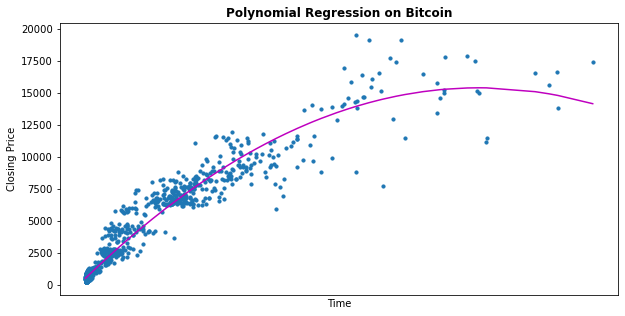

In [36]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as linreg
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVR as svr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
plt.figure(figsize=(10,5))
plt.title("Polynomial Regression on Bitcoin", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.tick_params(labelbottom = False, bottom = False)
btcData = data[(data['Symbol'] == 'BTC')]

x = btcData['Volume']
y = btcData['Close']
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

The R-Squared value is high here, with 0.95, meaning that polynomial regression of bitcoin, using x-values open, volume, and market cap, and predict the closing price with 95% accuracy 

105.69437856660775
0.8628119456933356


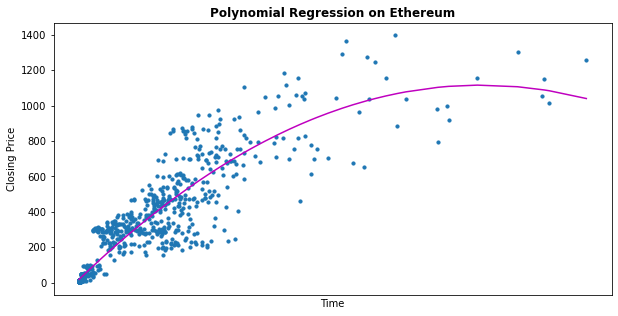

In [38]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
plt.figure(figsize=(10,5))
plt.title("Polynomial Regression on Ethereum", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.tick_params(labelbottom = False, bottom = False)
ethData = data[(data['Symbol'] == 'ETH')]

x = ethData['Volume']
y = ethData['Close']
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='m')

plt.show()

The R-Squared value is somwhat high with 0.86, meaning that polynomial regression of ethere, using x-values open, volume, and market cap, and predict the closing price with 86% accuracy 

0.48232034568684623
0.18666410202747608


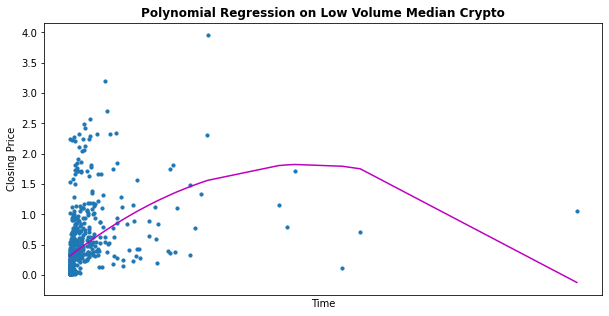

In [40]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as linreg
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVR as svr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
plt.figure(figsize=(10,5))
plt.title("Polynomial Regression on Low Volume Median Crypto", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.tick_params(labelbottom = False, bottom = False)
x = lowVolData['Volume']
y = lowVolData['Close']
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

The R-Squared value is very low here, with a value of 0.1866, meaning that polynomial regression of low volume cryptos, using x-values open, volume, and market cap, and predict the closing price with 18.6% accuracy 

0.018771020841399987
0.04109129527949562


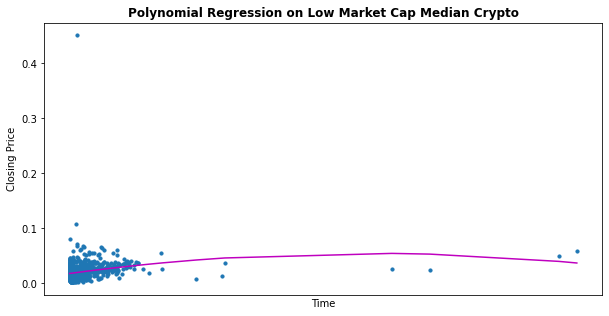

In [41]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as linreg
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVR as svr
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
plt.figure(figsize=(10,5))
plt.title("Polynomial Regression on Low Market Cap Median Crypto", fontweight='bold')
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.tick_params(labelbottom = False, bottom = False)
x = lowMCData['Volume']
y = lowMCData['Close']
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

The R-Squared value is very low with a value of 0.041, meaning that polynomial regression of low market cap cryptos, using x-values open, volume, and market cap, and predict the closing price with 4% accuracy 

As seen with polynomial regression, BTC r^2 value is quite high at .95, but ETH is at .86, giving us an average R-Squared value of .905. However the R-Squared values of low volume and low market cap cryptos were abyssmal and unusable for predictions.

## VI.2 Neural Network Regression

In [42]:
from sklearn.neural_network import MLPRegressor
x = btcData[['Open', 'Volume', 'Market Cap']]
y = btcData['Close']
nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=0)
nn.fit(X_train, y_train)
print_accuracy(nn.predict)

Root mean squared test error = 267.05589903124786


Using bitcoin for neural network regression, we can see the the root mean squared test error gives us 267. This means that using open, volume, and market cap on a given day, we can predict the closing price of bitcoin with a margin of error of 267 USD.

In [43]:
from sklearn.neural_network import MLPRegressor
x = lowVolData[['Open', 'Volume', 'Market Cap']]
y = lowVolData['Close']
nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=0)
nn.fit(X_train, y_train)
print_accuracy(nn.predict)

Root mean squared test error = 1.2209458092237997


Using our median gainer low volume crypto for neural network regression, we can see the the root mean squared test error gives us 1.22. This means that using open, volume, and market cap on a given day, we can predict the closing price of low volume cryptos with a margin of error of 1.22 USD, which may seem low. However, our average price for median gainer low volume crypto is below a dollar, ruling out the strategy of neural net regressions to predict closing price.

In [44]:
from sklearn.neural_network import MLPRegressor
x = lowMCData[['Open', 'Volume', 'Market Cap']]
y = lowMCData['Close']
nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=0)
nn.fit(X_train, y_train)
print_accuracy(nn.predict)

Root mean squared test error = 0.847807684977632


Using our low market cap median gainer crypto for neural network regression, we can see the the root mean squared test error gives us 0.84. This means that using open, volume, and market cap on a given day, we can predict the closing price of low market cap cryptos with a margin of error of 0.84 USD, which may seem low as well. However, given our average price for our median gainer low market cap crypto being below fifty cents, this strategy is highly inaccurate and therefore unusable.

## VI.3 Decision Tree Regression

In [85]:
from sklearn import tree
x = btcData[['Open', 'Volume', 'Market Cap']]
y = btcData['Close']
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=0)
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

Root mean squared test error = 324.60648563753625


Using bitcoin for our decision tree regression, we can see that the root mean squared test error gives us 324. This is higher than the Neural Network Regression. It gives us a margin of error of 324 on any given day of predicting bitcoin closing prices from open, volume, and market cap.

In [46]:
from sklearn import tree
x = lowVolData[['Open', 'Volume', 'Market Cap']]
y = lowVolData['Close']
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=0)
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

Root mean squared test error = 0.26704175052350004


Our Root mean squared test error is 0.267 meaning on any given day, we can predict the closing price of our median gainer low volume crypto with a margin of error of 0.267. While this may seem small, the price of our low volume median crypto is under $0.5, meaning it is extremely innacurate.

In [47]:
from sklearn import tree
x = lowMCData[['Open', 'Volume', 'Market Cap']]
y = lowMCData['Close']
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.25, random_state=0)
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

Root mean squared test error = 0.040102973305269914


Our Root mean squared test error is 0.0401 meaning on any given day, we can predict the closing price of our median gainer low Market Cap crypto with a margin of error of 0.0401. While this may seem small, the price of our low market cap median crypto is under $0.10, meaning it is extremely innacurate.

Comparing BTC with our low volume and low market cap cryptos outcomes, it is very unreasonable to try and predict closing prices of the latter categories using our decision tree regression.

## VI.4 Linear Regression

In [48]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = btcData[['Volume', 'Market Cap', 'Open']]
y = btcData['Close']

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

print('r^2 for BTC', r_sq)

r^2 for BTC 0.9952448267953556


Our R-Squared value using Linear Regression on bitcoin is extremely high with a value of 0.995. We can predict closing prices given open, volume, and market cap with 99.5% accuracy.

In [49]:
x = ethData[['Volume', 'Market Cap', 'Open']]
y = ethData['Close']

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

print('r^2 for ETH', r_sq)

r^2 for ETH 0.9938557714813779


Our R-Squared value using Linear Regression on ethereum is extremely high with a value of 0.993. We can predict closing prices given open, volume, and market cap with 99.3% accuracy.

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = lowVolData[['Volume', 'Market Cap', 'Open']]
y = lowVolData['Close']

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

print('r^2 for Low Volume Median Gainer Crypto', r_sq)

r^2 for Low Volume Median Gainer Crypto 0.9173825762867537


Our R-Squared value for low volume median gainer crypto is pretty high with a value of 0.91. We can predict closing prices given open, volume, and market cap with 91% accuracy. This is the only regression that seems to reasonably predict our low volume cryptos as the other regressions were extremely innacurate.

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

x = lowMCData[['Volume', 'Market Cap', 'Open']]
y = lowMCData['Close']

# Step 2b: Transform input data
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

# Step 3: Create a model and fit it
model = LinearRegression().fit(x_, y)

# Step 4: Get results
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

# Step 5: Predict
y_pred = model.predict(x_)

print('r^2 for Low Market Cap Median Gainer Crypto', r_sq)

r^2 for Low Market Cap Median Gainer Crypto 0.3966417812756322


Our R-Squared value for low market cap median gainer crypto is relatively low with a value of 0.39. We can predict closing prices given open, volume, and market cap with 39% accuracy. 

The average r^2 of BTC and ETH is 0.994 which is very accurate, and the highest so far. Interstingly, we found that we could predict closing prices of low volume cryptos with an r^2 value of .91, the highest regression values yet for that category too. However, regressions for bitcoin and ethereum remained the highest with respects to linear regression, revealing that high volume and high market cap cryptos are easier to predict, thus easier to make profit on.

## VII. Conclusion

Which categories of cryptocurrencies should Quantitative Hedge Funds and retail investors in general base their trading strategies off of? Looking at the long term investing route: We analyzed volume and market cap, where we modelled the max, min, and median gainers of bottom and top quartiles of volume and market cap. We also looked at high frequency, daily trading strategy where firms can look at daily indicators of open, volume, and marketcap to predict what the closing price would be every day. In the world of the crypto boom, the question is whether the market for crypto currencies is efficient enough to reveal a simple, straightforward strategy.

Based off the results, we've come to testable and reasonable conclusions that offer us great insight into our initial inquiry. Regarding the fundamental investing outlined in Sections I-IV, bottom quartile market cap cryptos seem to be the safest investment for investors due to their low spread and high median average returns. This information could be valuable because many people (especially in today's market) focus primarily on BTC, ETH, and the likes, due to their high media coverage. They may not pay attention to less risky, equally rewarding crytos in the low market cap category, and thus may be missing out on potential ways to boost profits or even hedge their portfolio.

Regarding the analysis of high frequency trading for Quantitative Hedge Funds, it seems high volume/market cap cryptocurrencies are a clear winner, as closing price is predictable given open price, market cap, and volume. Using Linear Regression, we got an Average R-Squared Value of 0.94, very accurate. Using our low volume median crypto and low market cap median crypto as placeholders for the sectors entirely of low volume and low market cap cryptos, trying to predict closing prices were extremely innacurate. The only time regression seemed to work was when we ran linear regression on our low volume median crypto which gave us an r-squared value of 0.91 which was still lower than the value for high market cap/volume. This proves that high market cap and high volume cryptos are superior to day-trade, perfect for high frequency trading strategies.